In [22]:
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv("/Users/saanchritu/Desktop/fart/notebooks/data/artist.csv")
df.head()

,id,name,genre,paintings
0,0,Amedeo Modigliani,Expressionism,193
1,1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",88
2,2,Diego Rivera,"Social Realism,Muralism",70
3,3,Claude Monet,Impressionism,73
4,4,Rene Magritte,"Surrealism,Impressionism",194


In [23]:
df.drop(columns=['years','nationality'],inplace=True)

KeyError: "['years', 'nationality'] not found in axis"

In [24]:
df.shape
df.to_csv('artist.csv', index=False)

In [26]:
selected_genres=[ "Impressionism",
    "Cubism",
    "Surrealism",
    "Abstract Art",
    "Pop Art",
    "Baroque",
    "Minimalism",
    "Futurism",
    "Gothic Art",
    "Expressionism" ]


df = df[df['genre'].isin(selected_genres)]

df.reset_index(drop=True, inplace=True)
df.to_csv("artist_filtered.csv",index=False)



In [27]:
import os

# --- Load artist metadata ---
artist_df = pd.read_csv('/Users/saanchritu/Desktop/fart/notebooks/artist_filtered.csv')

# Normalize artist names in artist_df
artist_df['name'] = artist_df['name'].str.replace('_', ' ').str.strip()

# --- Prepare image metadata ---
image_dir = '/Users/saanchritu/Desktop/fart/notebooks/data/resized'
image_paths = []
artists = []
genres = []

# Loop through all images
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        # Example: "Albrecht_Dürer_1.jpg" → "Albrecht Dürer"
        artist_from_filename = filename.rsplit('_', 1)[0].replace('_', ' ').strip()

        # Match with artist.csv to get genre
        match = artist_df[artist_df['name'] == artist_from_filename]

        if not match.empty:
            genre = match.iloc[0]['genre']
            image_paths.append(os.path.join(image_dir, filename))
            artists.append(artist_from_filename)
            genres.append(genre)
        else:
            # Optional: print unmatched artists
            print(f"No match found for artist: {artist_from_filename}")

# --- Create final DataFrame ---
image_df = pd.DataFrame({
    'image_path': image_paths,
    'artist': artists,
    'genre': genres
})

# --- Save to CSV ---
output_path = 'image_labels.csv'
image_df.to_csv(output_path, index=False)

print(f"✅ Saved image label file with {len(image_df)} entries to {output_path}")

No match found for artist: Gustav Klimt
No match found for artist: Vincent van Gogh
No match found for artist: Titian
No match found for artist: Leonardo da Vinci
No match found for artist: Titian
No match found for artist: Gustav Klimt
No match found for artist: Andrei Rublev
No match found for artist: Albrecht Dürer
No match found for artist: Frida Kahlo
No match found for artist: Mikhail Vrubel
No match found for artist: Leonardo da Vinci
No match found for artist: Frida Kahlo
No match found for artist: Mikhail Vrubel
No match found for artist: Leonardo da Vinci
No match found for artist: Albrecht Dürer
No match found for artist: Gustave Courbet
No match found for artist: Andrei Rublev
No match found for artist: Andrei Rublev
No match found for artist: Sandro Botticelli
No match found for artist: Albrecht Dürer
No match found for artist: Marc Chagall
No match found for artist: El Greco
No match found for artist: Marc Chagall
No match found for artist: Vincent van Gogh
No match fo

### 📅 Day 3: Exploratory Data Analysis (EDA)

Goal: Understand class balance and inspect image-label alignment.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image

dfi = pd. read_csv('image_labels.csv')
dfi. head()

,image_path,artist,genre
0,/Users/saanchritu/Desktop/fart/notebooks/data/...,Amedeo Modigliani,Expressionism
1,/Users/saanchritu/Desktop/fart/notebooks/data/...,Edgar Degas,Impressionism
2,/Users/saanchritu/Desktop/fart/notebooks/data/...,Edgar Degas,Impressionism
3,/Users/saanchritu/Desktop/fart/notebooks/data/...,Joan Miro,Surrealism
4,/Users/saanchritu/Desktop/fart/notebooks/data/...,Edgar Degas,Impressionism


In [29]:
genre_counts = dfi['genre'].value_counts ()
print("Number of genres:", dfi[ 'genre'].nunique())
print("\nImages per genre:\n", genre_counts)

Number of genres: 6

Images per genre:
 genre
Impressionism    1370
Baroque           495
Cubism            439
Surrealism        241
Expressionism     193
Pop Art           181
Name: count, dtype: int64


/var/folders/m_/jkn9510j4gqgm31xlcysskrc0000gn/T/ipykernel_1725/2162044467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


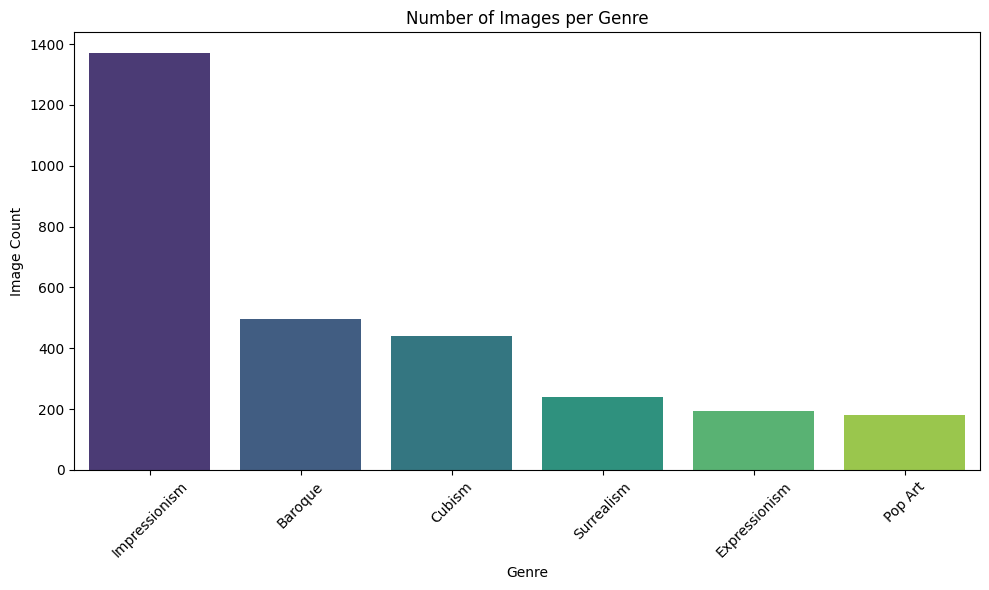

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Number of Images per Genre")
plt.xlabel ("Genre")
plt.ylabel("Image Count" )
plt.xticks(rotation=45)
plt.tight_layout ()
plt.show()

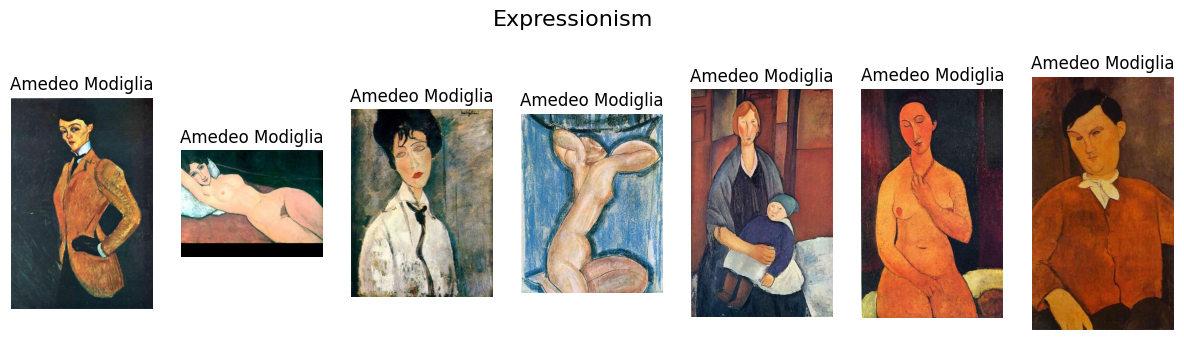

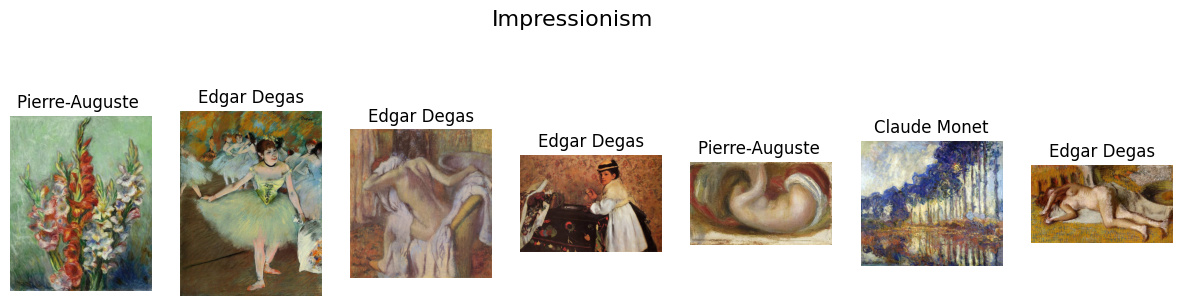

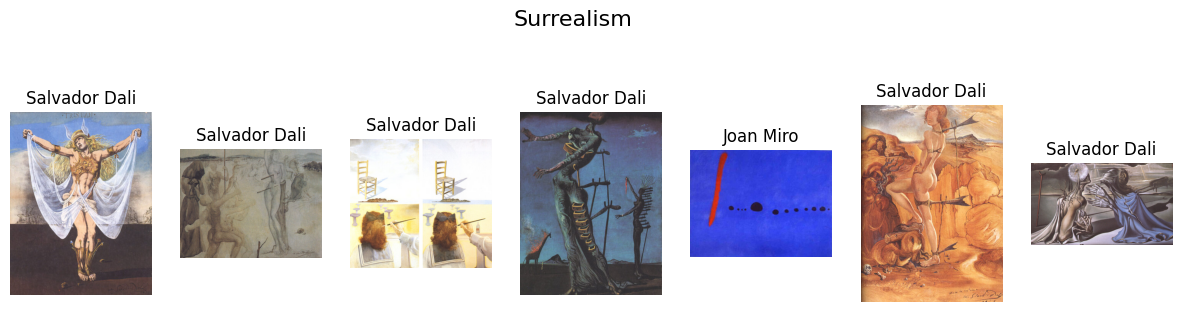

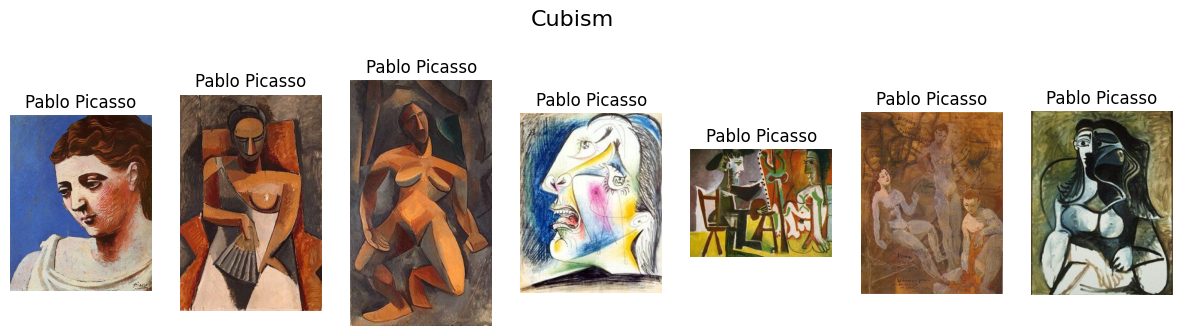

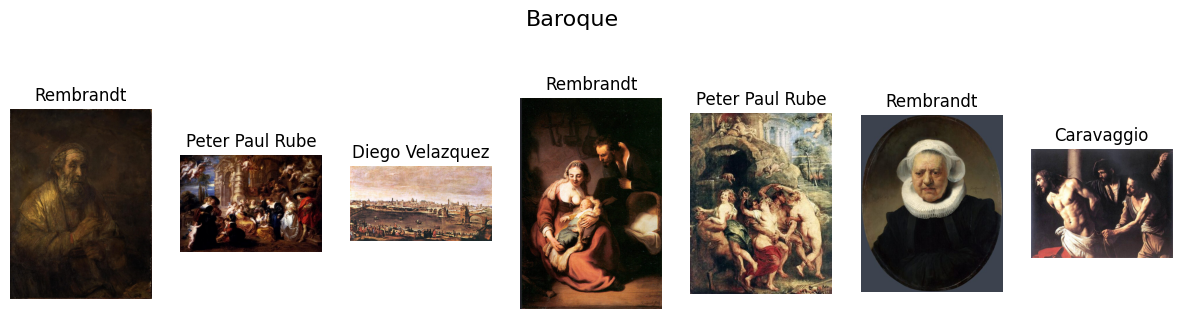

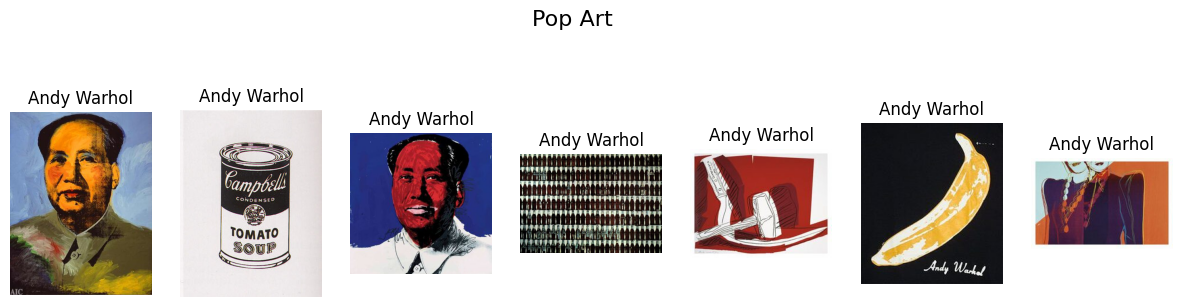

In [32]:
import matplotlib.pyplot as plt

def show_images_for_genre(df, genre, n=7):
    genre_df = dfi[dfi['genre'] == genre].sample(n=min(n, len(dfi[dfi['genre'] == genre])), random_state=42)

    plt.figure(figsize=(15, 4))
    for i, row in enumerate(genre_df.itertuples()):
        img = Image.open(row.image_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(row.artist[:15])  # Optional: Show artist name
    plt.suptitle(genre, fontsize=16)
    plt.show()

# Loop through all genres and show images
for genre in dfi['genre'].unique():
    show_images_for_genre(dfi, genre, n=7)

In [9]:
dfi.head()

,image_path,artist,genre
0,/Users/saanchritu/Desktop/fart/notebooks/data/...,Amedeo Modigliani,Expressionism
1,/Users/saanchritu/Desktop/fart/notebooks/data/...,Edgar Degas,Impressionism
2,/Users/saanchritu/Desktop/fart/notebooks/data/...,Edgar Degas,Impressionism
3,/Users/saanchritu/Desktop/fart/notebooks/data/...,Joan Miro,Surrealism
4,/Users/saanchritu/Desktop/fart/notebooks/data/...,Edgar Degas,Impressionism


In [5]:
# preprocessing/split_dataset.py
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
df.columns

Index(['image_path', 'artist', 'genre'], dtype='object')

In [11]:


df = pd.read_csv('/Users/saanchritu/Desktop/fart/csv/image_labels.csv')

train_val, test = train_test_split(df, test_size=0.1, stratify=df['genre'], random_state=42)
train, val = train_test_split(train_val, test_size=0.1, stratify=train_val['genre'], random_state=42)

train.to_csv('/Users/saanchritu/Desktop/fart/csv/train.csv', index=False)
val.to_csv('/Users/saanchritu/Desktop/fart/csv/val.csv', index=False)
test.to_csv('/Users/saanchritu/Desktop/fart/csv/test.csv', index=False)

In [18]:
import os
import pandas as pd

csv_path = "/Users/saanchritu/Desktop/fart/csv/image_labels_cleaned.csv"
img_dir = "/Users/saanchritu/Desktop/fart/notebooks/data/resized"

df = pd.read_csv(csv_path)
missing = [f for f in df['filename'] if not os.path.exists(os.path.join(img_dir, f))]
print(len(missing), "missing images")


2919 missing images


In [19]:
import pandas as pd
import os

test_csv_path = '/Users/saanchritu/Desktop/fart/csv/test.csv'

df = pd.read_csv(test_csv_path)
df['filename'] = df['filename'].apply(os.path.basename)  # keep only the file name
df.to_csv(test_csv_path, index=False)

print("✅ test.csv cleaned — only filenames now.")


✅ test.csv cleaned — only filenames now.


In [20]:
import pandas as pd
import os

test_csv_path = '/Users/saanchritu/Desktop/fart/csv/train.csv'

df = pd.read_csv(test_csv_path)
df['filename'] = df['filename'].apply(os.path.basename)  # keep only the file name
df.to_csv(test_csv_path, index=False)

print("✅ test.csv cleaned — only filenames now.")


✅ test.csv cleaned — only filenames now.
